# 0. Load libraries

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import matplotlib
from sklearn import tree


# 1. Load data

In [2]:
# Load the data
df = pd.read_csv('table.csv')

In [7]:
# First five lines of the initial dataset
df

,ClientId,RowId,Recency,Frequency,NbSessions,NbTotalSessions,NbBounces,TimeOnSite,NbHits,QualityAvg,DeviceCategory,Browser,OperatingSystem,NbEventHits,NbPageHits,NbUnknownAction,NbProductListAction,NbProductDetailsAction,IleDeFrance,AddToCart
0,1.000918e+09,214,99.729028,0.059907,2,2,NaN,1622.0,64,8.000000,mobile,Chrome,Android,41,23,33,4,25,1,1
1,1.001345e+09,316,88.479780,0.153430,4,18,2.0,611.0,53,3.500000,desktop,Chrome,Windows,35,18,40,4,8,1,1
2,1.002574e+09,609,92.854421,0.015567,2,2,NaN,2079.0,243,27.000000,desktop,Firefox,Windows,208,35,51,7,181,1,1
3,1.003163e+09,746,93.927731,1.728691,2,2,NaN,956.0,54,9.000000,desktop,Chrome,Windows,32,22,40,1,9,1,1
4,1.008759e+09,2015,91.861620,0.000000,1,3,NaN,315.0,41,4.000000,desktop,Chrome,Windows,33,8,20,1,17,0,1
5,1.009745e+09,2266,95.694387,0.019232,4,4,1.0,1831.0,107,15.500000,desktop,Chrome,Windows,71,36,76,5,21,1,1
6,1.016144e+09,3722,91.836562,0.000000,1,1,NaN,4633.0,500,58.000000,desktop,Chrome,Windows,402,98,142,14,327,0,1
7,1.016332e+08,3772,89.736644,0.000000,1,3,NaN,1591.0,59,26.000000,desktop,Chrome,Windows,49,10,29,1,28,0,1
8,1.016933e+09,3900,98.368391,0.099472,21,43,7.0,2559.0,319,4.238095,mobile,Chrome,Android,222,97,147,9,148,1,1
9,1.017363e+09,4002,88.567778,0.000000,1,1,NaN,464.0,52,11.000000,tablet,Safari,iOS,36,16,38,3,8,1,1


In [6]:
df.shape

(10000, 20)

# 2. Feature selection

In [8]:
# List of initial columns
df.columns

Index(['ClientId', 'RowId', 'Recency', 'Frequency', 'NbSessions',
       'NbTotalSessions', 'NbBounces', 'TimeOnSite', 'NbHits', 'QualityAvg',
       'DeviceCategory', 'Browser', 'OperatingSystem', 'NbEventHits',
       'NbPageHits', 'NbUnknownAction', 'NbProductListAction',
       'NbProductDetailsAction', 'IleDeFrance', 'AddToCart'],
      dtype='object')

In [9]:
# We store all variables to drop into a list
to_drop = ['ClientId','RowId','Recency','Frequency','NbTotalSessions','NbBounces','QualityAvg',
           'DeviceCategory','Browser','OperatingSystem','NbEventHits']
# We drop the variables
df = df.drop(to_drop,axis=1)

In [10]:
df.shape

(10000, 9)

In [11]:
# We fill missing values with zeros
df = df.fillna(0)

In [12]:
# First five lines of the final dataset
df.head(5)

,NbSessions,TimeOnSite,NbHits,NbPageHits,NbUnknownAction,NbProductListAction,NbProductDetailsAction,IleDeFrance,AddToCart
0,2,1622.0,64,23,33,4,25,1,1
1,4,611.0,53,18,40,4,8,1,1
2,2,2079.0,243,35,51,7,181,1,1
3,2,956.0,54,22,40,1,9,1,1
4,1,315.0,41,8,20,1,17,0,1


In [38]:
df.describe()

,NbSessions,TimeOnSite,NbHits,NbPageHits,NbUnknownAction,NbProductListAction,NbProductDetailsAction,IleDeFrance,AddToCart
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,1.924100,579.375500,40.048600,11.710500,23.193900,1.709000,14.06530,0.31420,0.274900
std,2.812353,1846.425186,104.077115,28.198287,58.102822,4.847151,48.13871,0.46422,0.446486
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000
25%,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.00000,0.00000,0.000000
50%,1.000000,121.000000,11.000000,4.000000,8.000000,0.000000,2.00000,0.00000,0.000000
75%,2.000000,478.000000,33.000000,11.000000,20.250000,1.000000,7.00000,1.00000,1.000000
max,76.000000,78401.000000,2045.000000,768.000000,1981.000000,114.000000,1107.00000,1.00000,1.000000


# 3. Train test split

In [13]:
# We split the dataset into explanatory variables and target variable
# Explanatory variables will be stored in X: all variables except "AddToCart"
X = df.drop('AddToCart',axis=1)
# Target variable will be stored in y: "AddToCart"
y = df['AddToCart']

In [14]:
# We define the proportion of our dataset that will be used for testing
testProp = 0.25
# We set a seed in order to avoid randomness in the splitting when we rerun the code
seed = 123
# We split the dataset into 4 parts
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = testProp,random_state=seed)

# 4. Models

## Logistic regression

In [28]:
exo=X_train #exogenous variables
exo=sm.add_constant(exo) #add constant to the exogenous variables
logreg = sm.GLM(y_train, exo, family=sm.families.Binomial()) 
logreg1=logreg.fit()
print(logreg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              AddToCart   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7491
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 11 Feb 2021   Deviance:                          nan
Time:                        14:20:29   Pearson chi2:                 2.25e+16
No. Iterations:                   100   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.7114      0.073    -37.074      0.000      -2.855      -2.568
NbSessions      

In [36]:
print('---- Model: Logistic regression ----')
# We first define the classifier
logreg = LogisticRegression(max_iter=1000)
# We fit the classifier over our training data
logreg.fit(X_train,y_train)
print(logreg.intercept_) #prints for example the intercept
# We compute the training accuracy
print('Training accuracy: ', logreg.score(X_train,y_train))

#just to check the hit rate wit the confusion matrix and understand that cut off = 0.5
mconf=confusion_matrix(y_train, logreg.predict(X_train))
print(mconf)
hitrate = (mconf[0,0]+mconf[1,1])/sum(sum(mconf))
hitrate*100

---- Model: Logistic regression ----
[-2.65776363]
Training accuracy:  0.9273333333333333
[[5409   45]
 [ 500 1546]]


92.73333333333333

In [37]:
# We apply our fitted model to our test set
y_pred = pd.DataFrame(logreg.predict(X_test))
y_pred.columns = ['Predictions']
# We compute the test accuracy
print('Test accuracy:', accuracy_score(y_test,y_pred))

Test accuracy: 0.9272


## Decision tree

In [78]:
print('---- Model: Decision tree ----')
# We first define the classifier
tree_estim = DecisionTreeClassifier()
# We fit the classifier over our training data
tree_estim.fit(X_train,y_train)
# We compute the training accuracy
print('Training accuracy: ', tree_estim.score(X_train,y_train))

#from sklearn.tree import plot_tree # tree diagram
#plot_tree(tree_estim);

---- Model: Decision tree ----
Training accuracy:  1.0


In [44]:
# We apply our fitted model to our test set
y_pred = pd.DataFrame(tree.predict(X_test))
y_pred.columns = ['Predictions']
# We compute the test accuracy
print('Test accuracy:', accuracy_score(y_test,y_pred))

Test accuracy: 0.8732


## Random forest

In [68]:
print('---- Model: Random forest ----')
# We first define the classifier
rf = RandomForestClassifier()
# We fit the classifier over our training data
rf.fit(X_train,y_train)
# We compute the training accuracy
print('Training accuracy: ', rf.score(X_train,y_train))



---- Model: Random forest ----
Training accuracy:  0.996


In [69]:
# We apply our fitted model to our test set
y_pred = pd.DataFrame(rf.predict(X_test))
y_pred.columns = ['Predictions']
# We compute the test accuracy
print('Test accuracy:', accuracy_score(y_test,y_pred))

Test accuracy: 0.898


## k-Fold Cross Validation

In [71]:
# We set k, the number of folds
k = 10

# We perform cross-validation over our 3 models: logreg, tree and rf
acc_log = cross_val_score(estimator = logreg, X=X_train, y=y_train, cv=k)


In [73]:
acc_tree = cross_val_score(estimator = tree_estim, X=X_train, y=y_train, cv=k)


In [74]:
acc_rf = cross_val_score(estimator = rf, X=X_train, y=y_train, cv=k)

# 5. Results analysis

In [75]:
# We compute the mean accuracy over the k ones for each model
print('Logistic regression accuracy: ', np.mean(acc_log))
print('Decision tree accuracy: ', np.mean(acc_tree))
print('Random forest accuracy: ', np.mean(acc_rf))

Logistic regression accuracy:  0.9298688642409438
Decision tree accuracy:  0.8784060489589018
Random forest accuracy:  0.892664024647155


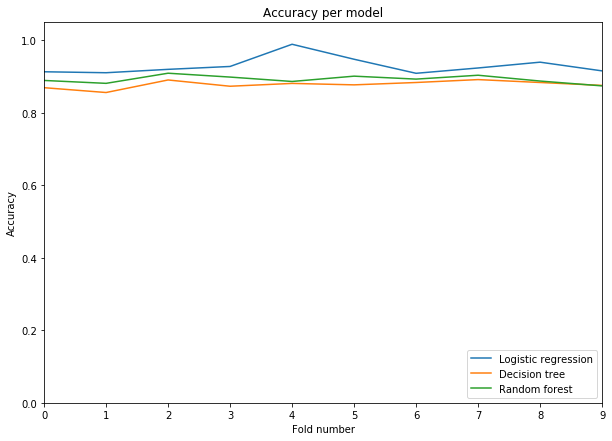

In [76]:
# We plot the accuracies for all models
plt.figure(figsize=(10,7))
plt.plot(acc_log,label='Logistic regression')
plt.plot(acc_tree,label='Decision tree')
plt.plot(acc_rf,label='Random forest')
plt.xlim([0., 9])
plt.ylim([0.0, 1.05])
plt.xlabel("Fold number")
plt.ylabel("Accuracy")
plt.title('Accuracy per model')
plt.legend(loc="lower right")